<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/NN_Airtime_Landing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [2]:
import json 
import numpy as np



with open('/content.gdrive/MyDrive/Unbenannter Ordner/dataset_distance.json', "r") as fp:
    data = json.load(fp)

X = np.array(data["keypoints"])
y = np.array(data["labels"])

print(X.shape)
print(y.shape)

(6701, 75)
(6701,)


In [3]:
#Creating binary classification model 
!pip install -U tensorflow-addons

import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM, Conv2D, Flatten,GlobalMaxPooling1D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy
from sklearn.utils import shuffle
import tensorflow_addons as tfa





def Ranger(sync_period=6,
           slow_step_size=0.5,
           learning_rate=0.001,
           beta_1=0.9,
           beta_2=0.999,
           epsilon=1e-7,
           weight_decay=0.,
           amsgrad=False,
           sma_threshold=5.0,
           total_steps=0,
           warmup_proportion=0.1,
           min_lr=0.,
           name="Ranger"):
    inner = tfa.optimizers.RectifiedAdam(learning_rate, beta_1, beta_2, epsilon, weight_decay, amsgrad, sma_threshold, total_steps, warmup_proportion, min_lr, name)
    optim = tfa.optimizers.Lookahead(inner, sync_period, slow_step_size, name)
    return optim



model = Sequential([
    
    Dense(units=750, input_shape=(75,1), activation='relu'), 
    Dense(units=1500, activation='relu'),                 
    Conv1D(filters=32, kernel_size=3, strides=3, padding='same',
           activation='relu'),
    Dropout(0.15),
    Conv1D(filters=64, kernel_size=3, strides=1, padding='same', 
           activation='relu'),
    Dropout(0.15),
    Flatten(),
    Dense(units=1, activation='sigmoid') 
])

save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Ranger(), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 28.9 MB/s 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75, 750)           1500      
                                                                 
 dense_1 (Dense)             (None, 75, 1500)          1126500   
                                                                 
 conv1d (Conv1D)             (None, 25, 32)            144032    
                                                                 
 dropout (Dropout)           (None, 25, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 64)            6208      
                                                                 
 dropout_1 (Dropout)         (N

In [4]:
history = model.fit(x=X, y=y, batch_size=40, validation_split = 0.1, epochs=1000, shuffle=True, verbose = 2, callbacks=[save_callback])

Epoch 1/1000
151/151 - 14s - loss: 0.6916 - accuracy: 0.5211 - val_loss: 0.6889 - val_accuracy: 0.5320 - 14s/epoch - 94ms/step
Epoch 2/1000
151/151 - 2s - loss: 0.6846 - accuracy: 0.5561 - val_loss: 0.6693 - val_accuracy: 0.6170 - 2s/epoch - 13ms/step
Epoch 3/1000
151/151 - 2s - loss: 0.6329 - accuracy: 0.6493 - val_loss: 0.5997 - val_accuracy: 0.7183 - 2s/epoch - 13ms/step
Epoch 4/1000
151/151 - 2s - loss: 0.5413 - accuracy: 0.7604 - val_loss: 0.5494 - val_accuracy: 0.7779 - 2s/epoch - 13ms/step
Epoch 5/1000
151/151 - 2s - loss: 0.4852 - accuracy: 0.7902 - val_loss: 0.4674 - val_accuracy: 0.8063 - 2s/epoch - 13ms/step
Epoch 6/1000
151/151 - 2s - loss: 0.4280 - accuracy: 0.8164 - val_loss: 0.4311 - val_accuracy: 0.8033 - 2s/epoch - 13ms/step
Epoch 7/1000
151/151 - 2s - loss: 0.3985 - accuracy: 0.8240 - val_loss: 0.3934 - val_accuracy: 0.8122 - 2s/epoch - 13ms/step
Epoch 8/1000
151/151 - 2s - loss: 0.3872 - accuracy: 0.8317 - val_loss: 0.4095 - val_accuracy: 0.8077 - 2s/epoch - 13ms/ste

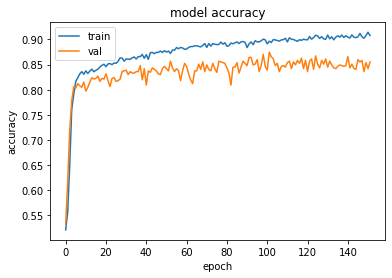

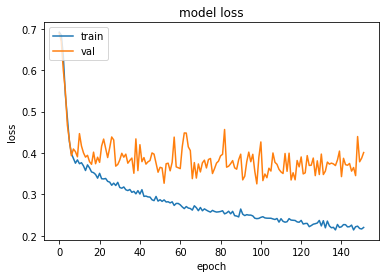

In [5]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
#predictions
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import json
import numpy as np
with open('/content.gdrive/MyDrive/Unbenannter Ordner/Dataset_modified_FP_LP.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X2 = np.array(data2["keypoints"])
y2 = np.array(data2["labels"])

#prepare 1575 - 945

print(X2.shape)
"""
delete_index = []
for i in range(21):
    liste = [*range(45+(i*75),75+(i*75),1)]
    delete_index.append(liste)

flat_list = [item for sublist in delete_index for item in sublist]

print(flat_list)
X2 = np.delete(X2, delete_index, axis=1)
"""


print(X2.shape)


predictions = model.predict(X2, batch_size = 10, verbose =0)
print(y2)
print(np.round(predictions))

"""
#Predict
y_prediction = model.predict(X2)
y_prediction = np.round(y_prediction)
#y_prediction = np.argmax (y_prediction, axis = 1)
#y_test=np.argmax(y2, axis=0)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y2, y_prediction , normalize='pred')
print(result)
print(y_prediction)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(result, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
"""
"""
counter =0
for i, x in enumerate(predictions):
    if np.around(x) != y2[i]:
        counter+=1
print(y2.shape)
print(counter)
"""

(124, 75)
(124, 75)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

'\ncounter =0\nfor i, x in enumerate(predictions):\n    if np.around(x) != y2[i]:\n        counter+=1\nprint(y2.shape)\nprint(counter)\n'